In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.1 MB/s eta 0:00:00
^C


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets_df = pd.read_csv("turkey_earthquake_tweets.csv")

In [ ]:
tweets_df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [ ]:
#tweets_df.to_csv()

In [ ]:
df1 = tweets_df[[ 'id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet']].copy()

In [ ]:
df1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [ ]:
df1.shape

(28844, 16)

In [ ]:
df1.isnull().sum()

id                      0
user_name               3
user_location        8077
user_description     2597
user_created            0
user_followers          0
user_friends            1
user_favourites         1
user_verified           1
date                    1
text                    1
hashtags            10978
source                  2
retweets                2
favorites               2
is_retweet              2
dtype: int64

In [ ]:
df1=df1.drop_duplicates("hashtags")

In [ ]:
df1.shape

(8120, 16)

In [ ]:
df1.head

<bound method NDFrame.head of                         id                                     user_name  \
0      1624185742552403969                                       Gogoman   
2      1624144833647415325                                   Eylem KILIÇ   
3      1624123056372187143                                bee | tarlos 🎗   
4      1624121846479061019                                         Ameya   
5      1624115816815009792                               M.d Jewell Azad   
...                    ...                                           ...   
28635  1629619008713392128                                 Haseeb Arslan   
28644  1629592571180642304         Tim Grecco @timgrecco@mastodon.online   
28647  1629583699082903553                                NewsGram Hindi   
28648  1629582343416545281  Uniting the Experience of Emergency Services   
28823  1629169020040630272                                            Nن   

                       user_location  \
0                

In [ ]:
df1.info

<bound method DataFrame.info of                         id                                     user_name  \
0      1624185742552403969                                       Gogoman   
2      1624144833647415325                                   Eylem KILIÇ   
3      1624123056372187143                                bee | tarlos 🎗   
4      1624121846479061019                                         Ameya   
5      1624115816815009792                               M.d Jewell Azad   
...                    ...                                           ...   
28635  1629619008713392128                                 Haseeb Arslan   
28644  1629592571180642304         Tim Grecco @timgrecco@mastodon.online   
28647  1629583699082903553                                NewsGram Hindi   
28648  1629582343416545281  Uniting the Experience of Emergency Services   
28823  1629169020040630272                                            Nن   

                       user_location  \
0              

In [ ]:
df1.date.value_counts()

2023-02-10 07:30:00+00:00    3
2023-02-13 13:06:47+00:00    2
2023-02-10 13:23:44+00:00    2
2023-02-12 16:33:32+00:00    2
2023-02-10 01:23:30+00:00    2
                            ..
2023-02-11 21:37:09+00:00    1
2023-02-11 21:44:24+00:00    1
2023-02-11 21:46:02+00:00    1
2023-02-11 21:47:47+00:00    1
2023-02-24 17:18:57+00:00    1
Name: date, Length: 8067, dtype: int64

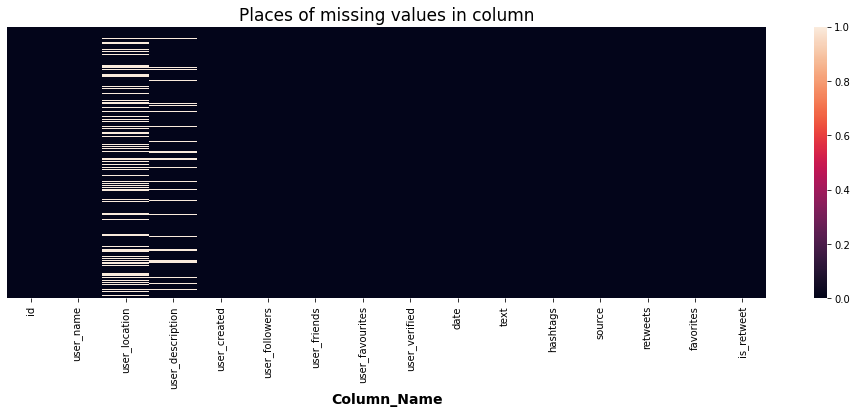

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df1['user_location'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

India                   240
Turkey                  184
Earth                    87
Pakistan                 86
New Delhi, India         86
United States            81
London, England          70
Kurdistan, Worldwide     64
Mumbai, India            63
İstanbul, Türkiye        59
Name: user_location, dtype: int64


In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
df1['user_followers'].apply(lambda x: [item for item in x if item not in stop])
df1.shape

(8120, 16)

In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [ ]:
df1['text'] = df1['text'].apply(lambda x: remove_punctuations(x))

In [ ]:
df1['user_location'].replace( '', np.nan, inplace=True)
df1.dropna(subset=["user_location"],inplace=True)
len(df1)

5821

In [ ]:
df1 = df1.reset_index(drop=True)
df1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False
1,1624115816815009792,M.d Jewell Azad,"Darjeeling, India",https://t.co/MF4oRSy7we,2020-09-30 19:52:36+00:00,81,47.0,3440.0,False,2023-02-10 18:39:19+00:00,Picture of the day.. 💞\n#TurkeyQuake #SyriaNee...,"['TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianP...",Twitter for Android,0.0,1.0,False
2,1624171580329795584,Criti Caster,Amersfoort,Real Estate - Runner - Swimmer - news junk - a...,2009-06-30 10:13:34+00:00,339,995.0,21231.0,False,2023-02-10 22:20:55+00:00,You cant believe what you see here...\n\n#Turk...,"['TurkeySyriaEarthquake', 'earthquaketurkey']",Twitter for Android,0.0,0.0,False
3,1624133719899402241,rababe kardellass,"Istanbul, Turkey","Journalist, Media researcher",2023-02-06 07:40:55+00:00,0,35.0,5.0,False,2023-02-10 19:50:28+00:00,We are praying with Turkey and Syria 🙏 🇹🇷🇸🇾 #e...,"['earthquakeinsyria', 'earthquaketurkey', 'Ear...",Twitter for iPhone,0.0,0.0,False
4,1624046276986736642,Lana Maks,Resident of Planet Earth,Every person on planet Earth should live in sa...,2021-09-27 09:40:01+00:00,137,87.0,10664.0,False,2023-02-10 14:03:00+00:00,📍#Humanity has two choices either total destru...,"['Humanity', 'planet', 'disasters', 'CreativeS...",Twitter Web App,1.0,4.0,False


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quake', 'syria', 'turkey', 'turkeyquake'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


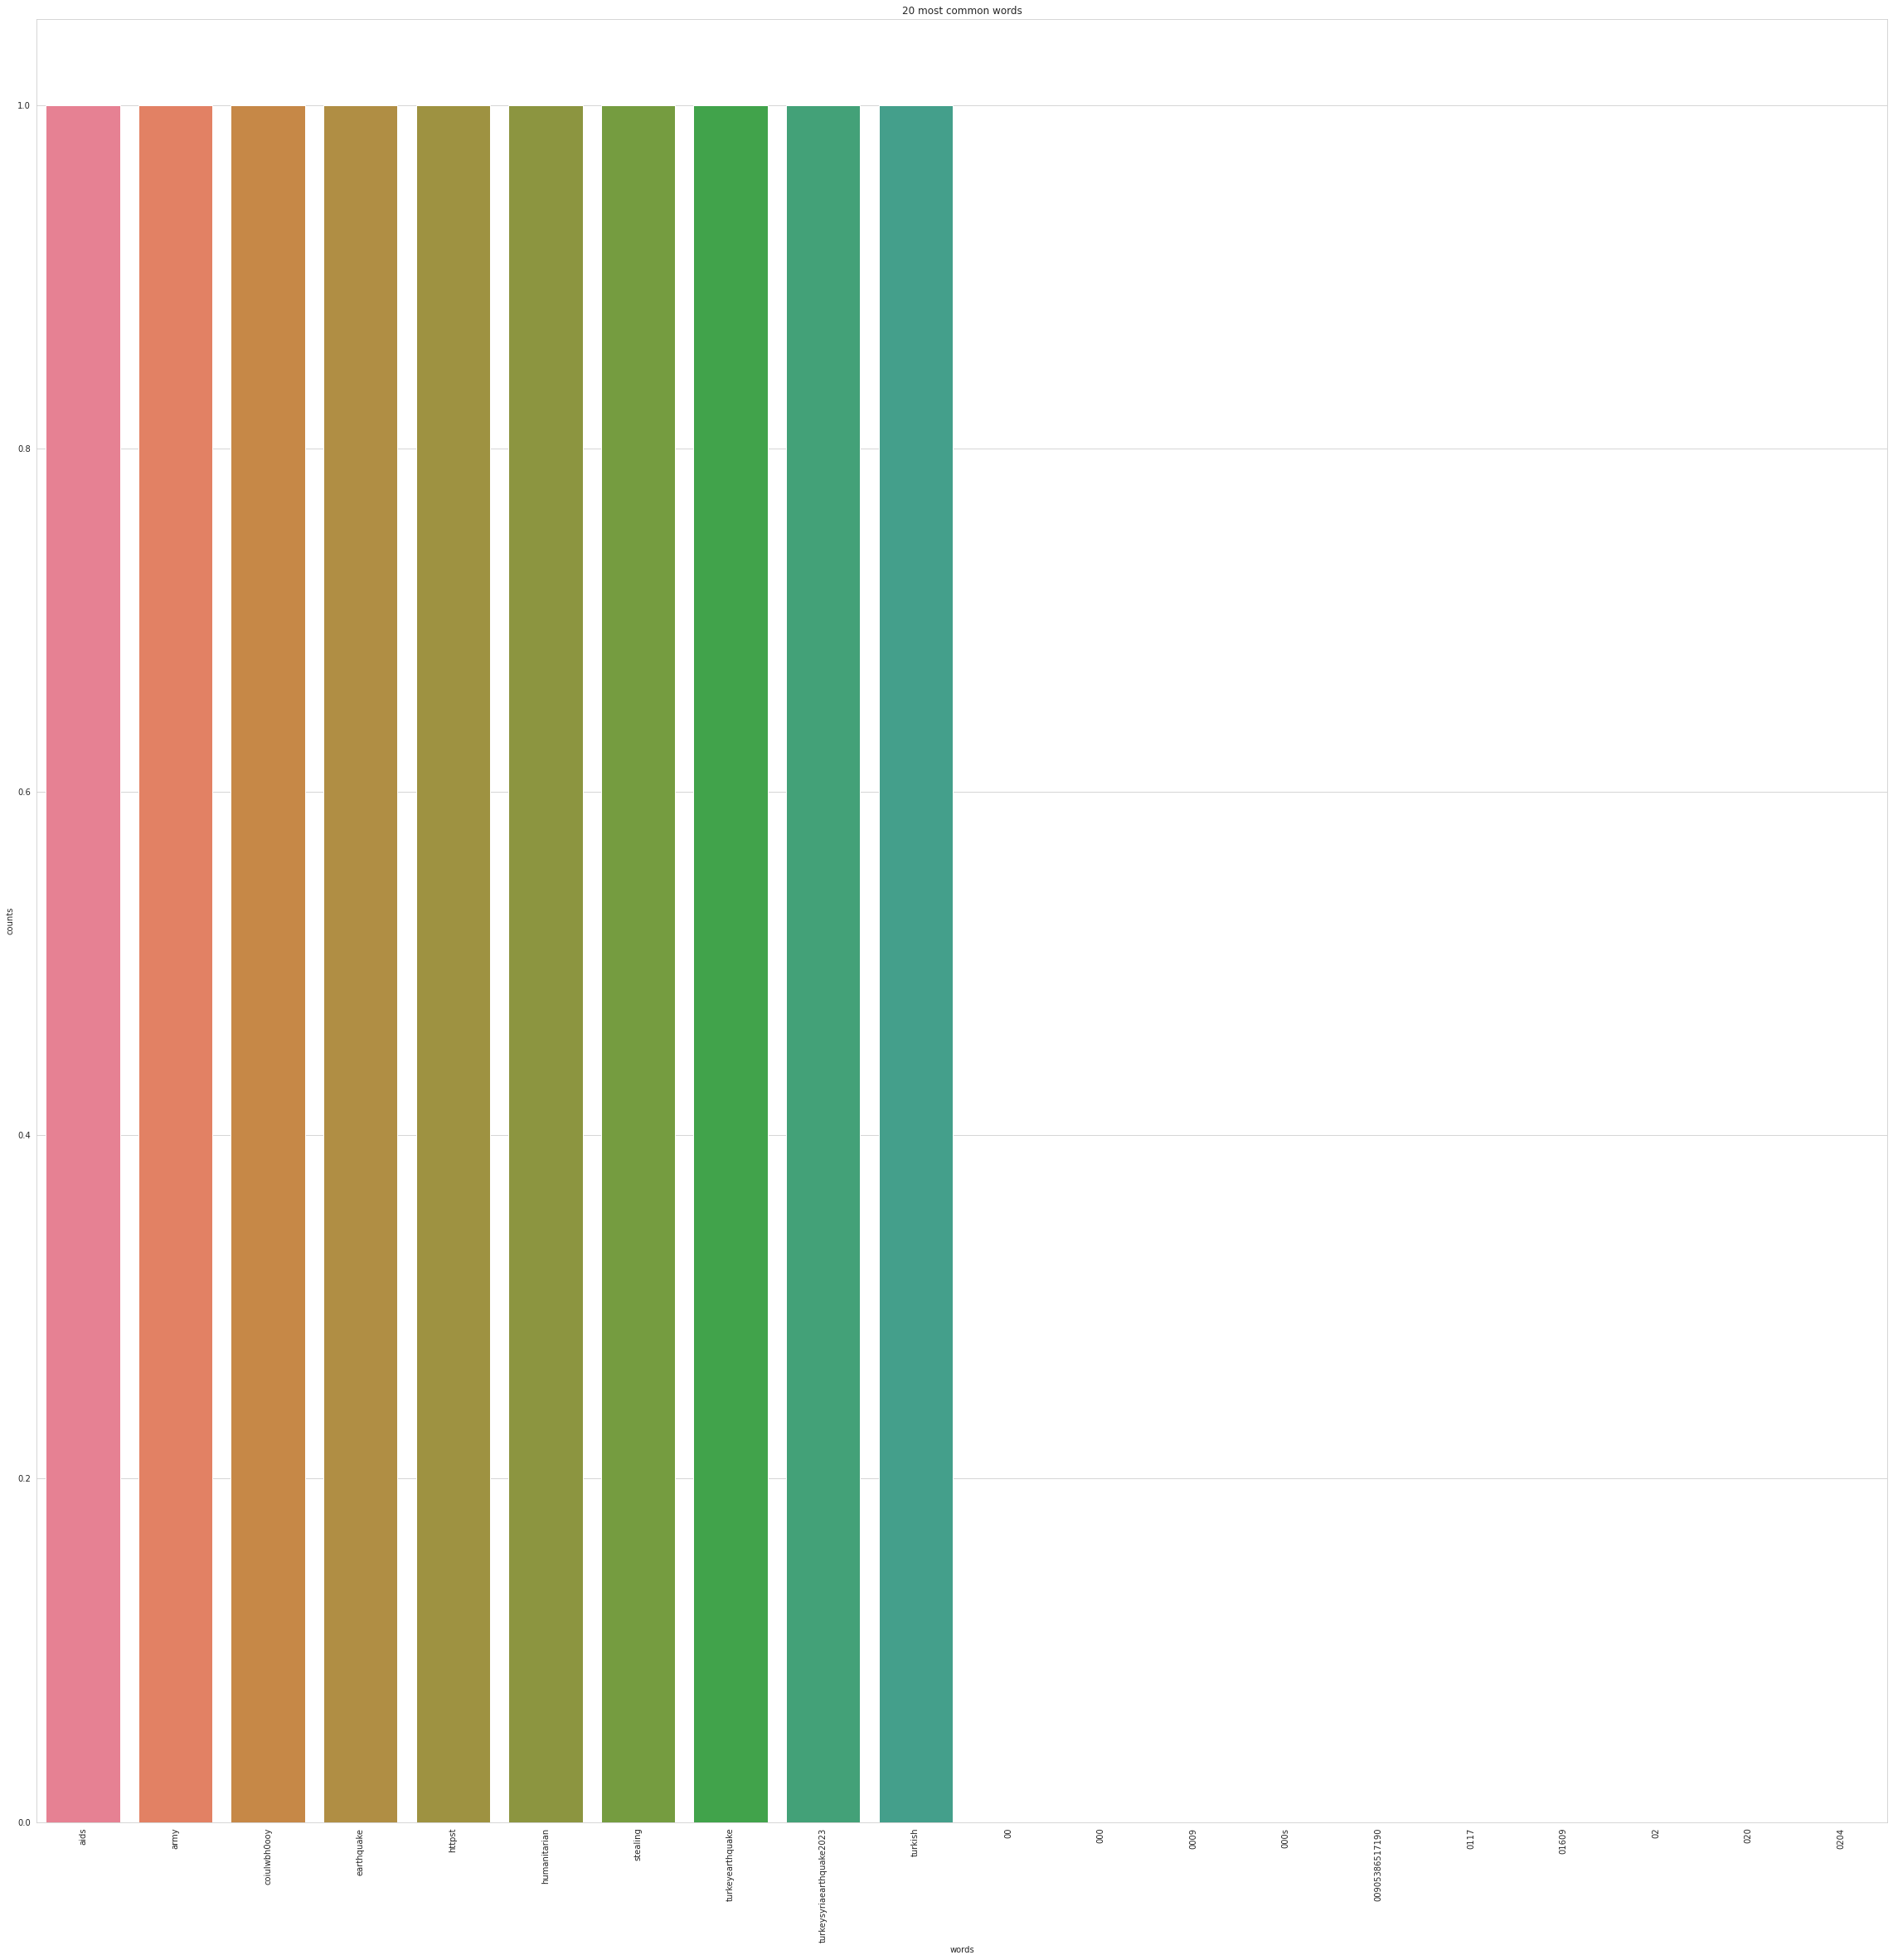

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop+['Turkey','TurkeyQuake','Quake','Syria','disasters','planet','humanity']
def plot_20_most_common_words(count_data, count_vectorizer) :
  import matplotlib. pyplot as plt
  words = count_vectorizer.get_feature_names()
  total_counts = np. zeros(len(words))
  for t in count_data:
    total_counts = t.toarray()[0]

  count_dict = (zip(words, total_counts))
  count_dict = sorted(count_dict, key=lambda x:x[1],reverse=True)[0:20]
  words = [w[0] for w in count_dict]
  counts = [w[1] for w in count_dict]
  x_pos = np.arange(len(words))

  plt.figure(2, (40,40))
  plt.subplot(title = '20 most common words')
  sns. set_context('notebook',font_scale=4,rc={ 'lines.linewidth' :2.5})
  sns.barplot(x_pos, counts, palette='husl')
  plt.xticks(x_pos, words, rotation=90)
  plt.xlabel('words')
  plt.ylabel('counts')
  plt.show()

count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df1['text'])
# print(count_vectorizer)
# print(count_data)
# Visualise the 20 most common words
plot_20_most_common_words(count_data,count_vectorizer)
plt.savefig( 'saved_figure.png')

<AxesSubplot:title={'center':'Top 8 bigrams'}, ylabel='ngram'>

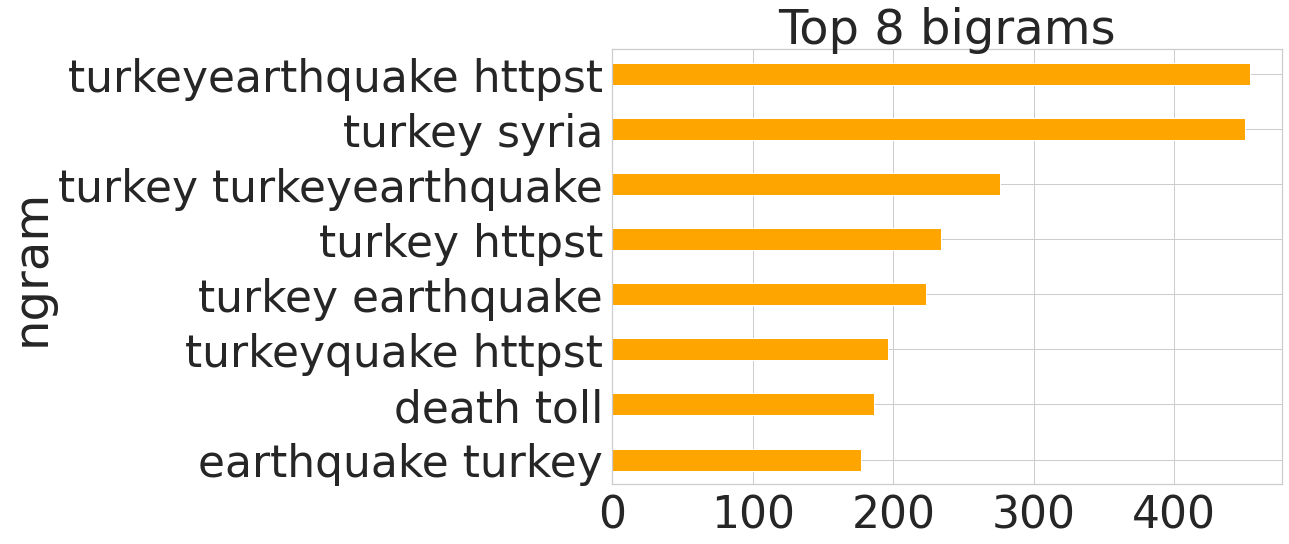

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(df1['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df1['subjectivity']=df1[ 'text'].apply(get_subjectivity)
df1[ 'polarity' ]=df1[ 'text'].apply(get_polarity)
df1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity
0,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False,0.90,0.2
1,1624115816815009792,M.d Jewell Azad,"Darjeeling, India",https://t.co/MF4oRSy7we,2020-09-30 19:52:36+00:00,81,47.0,3440.0,False,2023-02-10 18:39:19+00:00,Picture of the day.. 💞\n#TurkeyQuake #SyriaNee...,"['TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianP...",Twitter for Android,0.0,1.0,False,0.00,0.0
2,1624171580329795584,Criti Caster,Amersfoort,Real Estate - Runner - Swimmer - news junk - a...,2009-06-30 10:13:34+00:00,339,995.0,21231.0,False,2023-02-10 22:20:55+00:00,You cant believe what you see here...\n\n#Turk...,"['TurkeySyriaEarthquake', 'earthquaketurkey']",Twitter for Android,0.0,0.0,False,0.00,0.0
3,1624133719899402241,rababe kardellass,"Istanbul, Turkey","Journalist, Media researcher",2023-02-06 07:40:55+00:00,0,35.0,5.0,False,2023-02-10 19:50:28+00:00,We are praying with Turkey and Syria 🙏 🇹🇷🇸🇾 #e...,"['earthquakeinsyria', 'earthquaketurkey', 'Ear...",Twitter for iPhone,0.0,0.0,False,0.00,0.0
4,1624046276986736642,Lana Maks,Resident of Planet Earth,Every person on planet Earth should live in sa...,2021-09-27 09:40:01+00:00,137,87.0,10664.0,False,2023-02-10 14:03:00+00:00,📍#Humanity has two choices either total destru...,"['Humanity', 'planet', 'disasters', 'CreativeS...",Twitter Web App,1.0,4.0,False,0.75,0.0


In [ ]:
df1['textblob_score'] =df1[ 'text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
neutral_threshold=0.05

In [ ]:

df1['textblob_sentiment']=df1[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [ ]:
textblob_df =  df1[['text','textblob_sentiment','user_favourites']]
textblob_df

,text,textblob_sentiment,user_favourites
0,@adgpi Hey @BBCWorld try to cover these storie...,positive,106.0
1,Picture of the day.. 💞\n#TurkeyQuake #SyriaNee...,Neutral,3440.0
2,You cant believe what you see here...\n\n#Turk...,Neutral,21231.0
3,We are praying with Turkey and Syria 🙏 🇹🇷🇸🇾 #e...,Neutral,5.0
4,📍#Humanity has two choices either total destru...,Neutral,10664.0
...,...,...,...
5816,"🚨 Death toll from #TurkiyeQuakes rises to 44,2...",Neutral,2779.0
5817,#Pressfreedom groups have claimed that dozens ...,Neutral,144698.0
5818,Turkey begins rebuilding for 1.5M left homeles...,Neutral,1422.0
5819,@DailyTurkic 📍 #Turkey faces hardships after t...,positive,376.0


In [ ]:
textblob_df["textblob_sentiment"].value_counts()

Neutral     3525
positive    1546
Negative     750
Name: textblob_sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

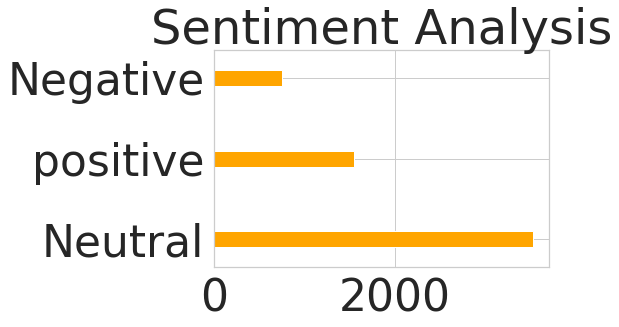

In [ ]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.2, figsize=(6,4),stacked = True)

In [ ]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [ ]:
df_very_positive=df_positive[df_positive['user_favourites']>0]

In [ ]:
df_very_positive.head()

,text,textblob_sentiment,user_favourites
0,@adgpi Hey @BBCWorld try to cover these storie...,positive,106.0
5,📍#People we need #CreativeSociety and we will ...,positive,10664.0
17,Llegada a Estambul del equipo #USAR Ligero ESP...,positive,5599.0
18,⚠️ BREAKING SOMETHING SHIFTED BRINGS GREAT CO...,positive,48.0
23,Am happy that they safe we need to pray and se...,positive,276112.0


In [ ]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [ ]:
df_negative

,text,textblob_sentiment,user_favourites
8,It's horrible! #People urgently need #Creative...,Negative,10664.0
21,Devastating visual from the earthquake affecte...,Negative,650.0
22,Terrifying How can she even thought like that!...,Negative,3502.0
27,httpst.coVOrDe1siHn update. Calamity in Turkey...,Negative,16770.0
41,#earthquaketurkey my heart goes out to the peo...,Negative,4014.0
...,...,...,...
5802,#TurkeyEarthquake #Turkey #Turquia #JapanEa...,Negative,6726.0
5806,📌#Fenerbahçe fans threw hats and scarves onto ...,Negative,7.0
5807,Erdoğan government protested during first top-...,Negative,0.0
5810,Cause every little bit help.\n#syrianeedshelp ...,Negative,276.0


In [ ]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [ ]:
df_neutral

,text,textblob_sentiment,user_favourites
1,Picture of the day.. 💞\n#TurkeyQuake #SyriaNee...,Neutral,3440.0
2,You cant believe what you see here...\n\n#Turk...,Neutral,21231.0
3,We are praying with Turkey and Syria 🙏 🇹🇷🇸🇾 #e...,Neutral,5.0
4,📍#Humanity has two choices either total destru...,Neutral,10664.0
6,Why is YouTube violating #democracy Why is #Yu...,Neutral,10664.0
...,...,...,...
5815,Rescue teams in #Turkiye (#Turkey) and #Syria ...,Neutral,14515.0
5816,"🚨 Death toll from #TurkiyeQuakes rises to 44,2...",Neutral,2779.0
5817,#Pressfreedom groups have claimed that dozens ...,Neutral,144698.0
5818,Turkey begins rebuilding for 1.5M left homeles...,Neutral,1422.0


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

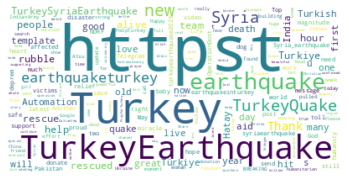

In [ ]:
#Creating the text variable
positive_tw =" ".join(t for t in df_very_positive.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud1 = WordCloud(collocations = False, background_color = 'white') .generate(positive_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

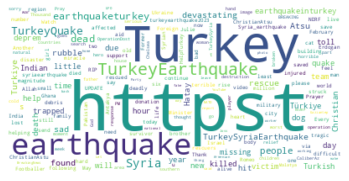

In [ ]:
#Creating the text variable
negative_tw =" ".join(t for t in df_negative.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(negative_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

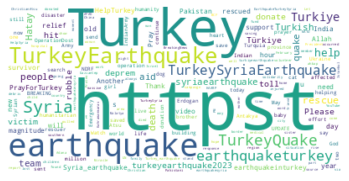

In [ ]:
#Creating the text variable
neutral_tw =" ".join(t for t in df_neutral.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(neutral_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()